In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import pickle

In [2]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [3]:
with open('DB/credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [4]:
X_train.shape, y_train.shape

((1500, 3), (1500,))

In [5]:
#Usando 1000 Decision Trees
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [6]:
prev = rf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, prev)

0.984

0.984

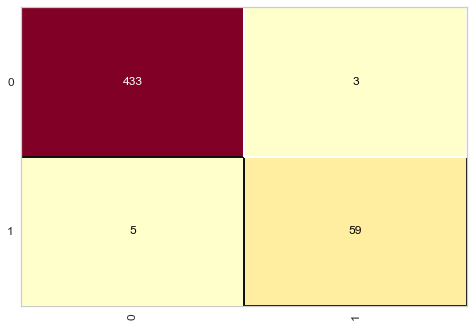

In [8]:
#Matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [9]:
print(classification_report(y_test, prev))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



In [10]:
#Reescrevendo as variáveis com os valores da base census
with open('DB/census.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [11]:
X_train.shape, y_train.shape

((27676, 108), (27676,))

In [12]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [13]:
prev = rf.predict(X_test)

In [14]:
accuracy_score(y_test, prev)

0.8507676560900717

0.8507676560900717

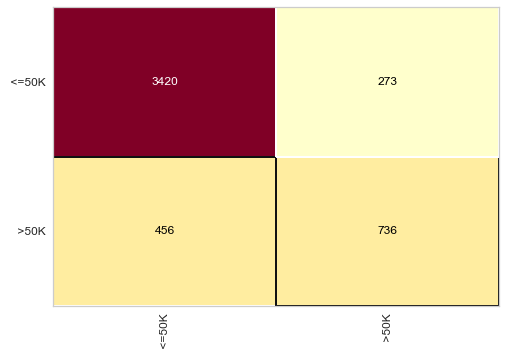

In [15]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [16]:
print(classification_report(y_test, prev))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



OneR = a simple, yet accurate, classification algorithm that generates one rule for each predictor in the data, then selects the rule with the smallest total error as its "one rule"

In [17]:
import Orange

In [18]:
dataFrame_RC = Orange.data.Table('DB/risco_credito_regras.csv')

In [19]:
dataFrame_RC

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [20]:
dataFrame_RC.domain

[historia, divida, garantias, renda | risco]

In [21]:
cn2 = Orange.classification.rules.CN2Learner()

In [22]:
#Treinamento do algorítimo / criação das regras
rules_RC = cn2(dataFrame_RC)

In [23]:
for rules in rules_RC.rule_list:
    print(rules)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [24]:
pred = rules_RC([['boa', 'alta', 'nenhuma','acima_35'],['ruim', 'alta', 'adequada','0_15']])

In [25]:
pred

array([1, 0], dtype=int64)

In [26]:
dataFrame_RC.domain.class_var.values

('alto', 'baixo', 'moderado')

In [27]:
for i in pred:
    print(dataFrame_RC.domain.class_var.values[i])

baixo
alto


In [28]:
dataFrame_CD = Orange.data.Table('DB/credit_data_regras.csv')

In [29]:
dataFrame_CD

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [30]:
dataFrame_CD.domain

[income, age, loan | default]

In [31]:
#Criando variável que separa em uma base de teste e uma de trinamento
df_split = Orange.evaluation.testing.sample(dataFrame_CD, n = 0.25)

In [32]:
df_split[0], df_split[1]

([[28163.3, 58.0035, 2121.15 | 0],
  [41816.7, 48.9172, 4534.58 | 0],
  [61869.5, 36.2273, 1040.49 | 0],
  [59132.7, 48.345, 4575.53 | 0],
  [33572.4, 57.4422, 3369.38 | 0],
  ...
 ],
 [[39988.7, 54.2687, 357.088 | 0],
  [34981.4, 23.4877, 5502.74 | 1],
  [59589.1, 20.6098, 4191.72 | 0],
  [22279.3, 58.9073, 3141.34 | 0],
  [35195.5, 49.6584, 2836.99 | 0],
  ...
 ])

In [33]:
df_train = df_split[1]
df_test = df_split[0]

In [34]:
len(df_test), len(df_train)

(500, 1500)

In [35]:
cn2 = Orange.classification.rules.CN2Learner()
rules_CD = cn2(df_train)

In [36]:
for rules in rules_CD.rule_list:
    print(rules)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=7708.31562497011 AND loan>=9698.582169129 THEN default=1 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF loan<=5785.88427485782 AND income>=46118.5501003638 THEN default=0 
IF loan<=4849.33378471958 AND age>=34.1016539284028 THEN default=0 
IF income<=60019.447135273396 AND age>=33.6821509548463 THEN default=1 
IF age>=33.403173910453894 THEN default=0 
IF loan<=4849.33378471958 AND age>=32.8975483207032 THEN default=1 
IF income<=60019.447135273396 AND loan>=5061.77783089573 AND age>=29.4230185477063 THEN default=1 
IF loan>=7218.9682240579195 AND loan>=9595.28628892989 THEN default=0 
IF loan>=7218.9682240579195 AND loan>=8034.74777409028 THEN default=1 
IF age>=32.718134177383 THEN default=0 
IF loan>=4849.33378471958 AND age>=29.417216334492 THEN default=0 
IF loan<=4849.33378471958 AND age>=32.516422502230895 THEN default=1 
IF age>=30

In [37]:
pred = Orange.evaluation.testing.TestOnTestData(df_train, df_test, [lambda testdata: rules_CD])

In [38]:
pred

In [39]:
Orange.evaluation.CA(pred)

array([0.968])

Começando Majority Learner - consiste em classificar novos dados com base na maioria do resultado de classe mais predominante. Dessa forma, um algorítimo deverá ser mais eficaz do que o Majority Learner

In [40]:
base_credit = Orange.data.Table('DB/credit_data_regras.csv')

In [41]:
base_credit.domain

[income, age, loan | default]

In [42]:
majority = Orange.classification.MajorityLearner()

In [43]:
pred = Orange.evaluation.testing.TestOnTestData(base_credit,base_credit,[majority])

In [44]:
Orange.evaluation.CA(pred)

array([0.8585])

In [45]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [46]:
base_census = Orange.data.Table('DB/census_regras.csv')

In [47]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [48]:
majority = Orange.classification.MajorityLearner()


In [49]:
pred = Orange.evaluation.testing.TestOnTestData(base_census,base_census,[majority])

In [50]:
Orange.evaluation.CA(pred)

array([0.75919044])

Como já visto a cima, um algoritmo deve ter accuracy maior que 75% (Majority Learner)

In [51]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [52]:
24720 / (24720 + 7841)

0.7591904425539756